# **Mean Reversion Trading Strategy Using Python**

**Definition:**
* Mean reversion, or reversion to the mean, is a theory used in finance that suggests that asset price volatility and historical returns eventually will revert to the long-run mean or average level of the entire dataset
* The mean reversion theory is used as part of a statistical analysis of market conditions and can be part of an overall trading strategy. It applies well to the ideas of buying low and selling high, by hoping to identify abnormal activity that will, theoretically, revert to a normal pattern


**Limitations of Mean Reversion**
* The return to a normal pattern is not guaranteed, as unexpected highs or lows could indicate a shift in the norm. Such events could include, but are not limited to, new product releases or developments on the positive side, or recalls and lawsuits on the negative side

* An asset could experience a mean reversion even in the most extreme event. But as with most market activity, there are few guarantees about how particular events will or will not affect the overall appeal of particular securities

**Install yfinance libraries to get the historical data of the stock**

In [1]:
# !pip install yfinance

**Importing required libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

**Data Ingestion**

In [3]:
df = yf.download("HAPPSTMNDS.NS", start="2010-01-01", end="2022-12-31")

[*********************100%***********************]  1 of 1 completed


**show the data**

In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-17 00:00:00+05:30,350.000000,394.950012,350.000000,370.950012,367.663239,52000357
2020-09-18 00:00:00+05:30,376.000000,380.950012,357.000000,358.700012,355.521790,10745190
2020-09-21 00:00:00+05:30,354.000000,374.500000,330.299988,349.399994,346.304169,12519290
2020-09-22 00:00:00+05:30,350.000000,358.600006,335.000000,353.950012,350.813843,4965436
2020-09-23 00:00:00+05:30,358.200012,362.250000,343.100006,352.299988,349.178436,3317252
...,...,...,...,...,...,...
2022-12-26 00:00:00+05:30,850.950012,879.900024,845.700012,873.000000,873.000000,178822
2022-12-27 00:00:00+05:30,888.500000,896.250000,875.000000,882.000000,882.000000,182333
2022-12-28 00:00:00+05:30,882.599976,892.000000,875.500000,881.799988,881.799988,127369


**Creating a function to calculate Simple Moving Average (SMA)**

**What Is a Simple Moving Average (SMA)?**
* A simple moving average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range
 
**<center>$SMA = \frac{A_1 + A_2 + ... + A_n}{n}$</center>**
where:
* $A_n$ = the price of an asset at period n
* $n$ = the number of total periods
​


In [5]:
def SMA(data, period = 30, column = 'Close'):
  return data[column].rolling(window = period).mean()

**Calculate Simple moving average, simple returns, log returns and ratios**
  * If close price > SMA the ratio will be greater than 1, else it wil be less than 1
  * If close price = SMA then ratio will be 1

In [6]:
df['SMA'] = SMA(df, 21, 'Close')
df['Simple_Returns'] = df.pct_change(1)['Close']
df['Log_Returns'] = np.log(1+df['Simple_Returns'])
df['Ratios'] = df['Close'] / df['SMA']
df

,Open,High,Low,Close,Adj Close,Volume,SMA,Simple_Returns,Log_Returns,Ratios
Date,,,,,,,,,,
2020-09-17 00:00:00+05:30,350.000000,394.950012,350.000000,370.950012,367.663239,52000357,NaN,NaN,NaN,NaN
2020-09-18 00:00:00+05:30,376.000000,380.950012,357.000000,358.700012,355.521790,10745190,NaN,-0.033023,-0.033581,NaN
2020-09-21 00:00:00+05:30,354.000000,374.500000,330.299988,349.399994,346.304169,12519290,NaN,-0.025927,-0.026269,NaN
2020-09-22 00:00:00+05:30,350.000000,358.600006,335.000000,353.950012,350.813843,4965436,NaN,0.013022,0.012938,NaN
2020-09-23 00:00:00+05:30,358.200012,362.250000,343.100006,352.299988,349.178436,3317252,NaN,-0.004662,-0.004673,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-12-26 00:00:00+05:30,850.950012,879.900024,845.700012,873.000000,873.000000,178822,934.454758,0.029178,0.028760,0.934235
2022-12-27 00:00:00+05:30,888.500000,896.250000,875.000000,882.000000,882.000000,182333,931.307141,0.010309,0.010257,0.947056
2022-12-28 00:00:00+05:30,882.599976,892.000000,875.500000,881.799988,881.799988,127369,928.314282,-0.000227,-0.000227,0.949894


**Get some statistics on the ratio column**

In [7]:
df['Ratios'].describe().T

count    549.000000
mean       1.018760
std        0.082866
min        0.856121
25%        0.970187
50%        1.001872
75%        1.044379
max        1.417851
Name: Ratios, dtype: float64

**Calculate the 15th, 20th, 50th, 80th and 85th percentile of ratios**

In [8]:
# Get and show the percentile values
percentiles = [15, 20, 50, 80, 85]
# Remove any NaN values in the Ratios column and store the result in a new variable called ratios
ratios = df['Ratios'].dropna()
# Get the values of the percentiles
percentile_values =  np.percentile(ratios, percentiles)
# Show the values of the percentiles
percentile_values
# This percentiles values help us in when to buy the asset

array([0.94807776, 0.96037672, 1.00187161, 1.06340422, 1.09055276])

**Plot the percentiles with the ratios to check the buy and sell signal**

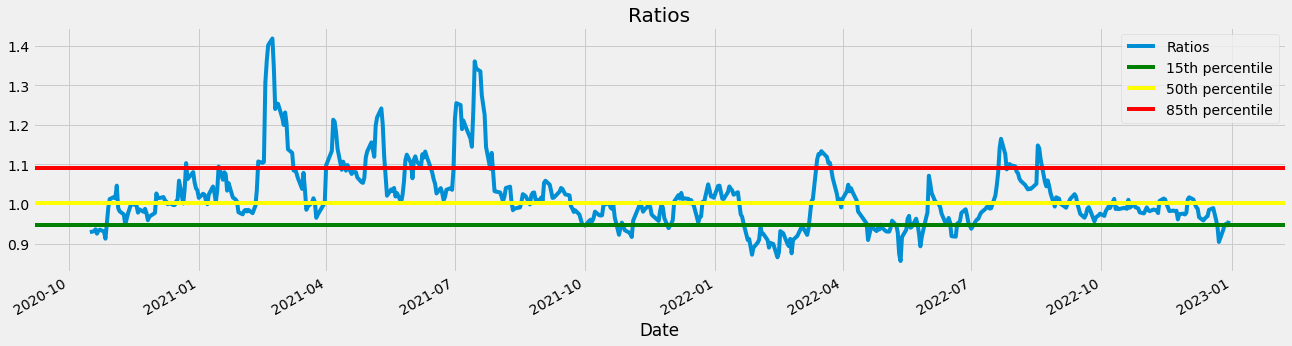

In [9]:
#  Plot the ratios
plt.figure(figsize = (20,5))
plt.title('Ratios')
df['Ratios'].dropna().plot(legend = True)
# If close price > SMA then sell signal
# If close price < SMA then buy signal and we aspect that the price will go up to SMA atleast
plt.axhline(percentile_values[0], c='green', label = '15th percentile')
plt.axhline(percentile_values[2], c='yellow', label = '50th percentile')
plt.axhline(percentile_values[4], c='red', label = '85th percentile')
plt.legend()
plt.show()

**Observation:**
  * Above red line - Sell
  * Below green line - Buy 

**Create Buy and Sell Signal**

In [10]:
# 85th percentile threshold where we want to sell 
sell = percentile_values[4]
# 15th percentile threshold where we want to buy 
buy = percentile_values[0]

#  Put -1 where the ratio is greater than the percentile to sell and Nan otherwise
df['positions'] = np.where(df['Ratios'] > sell, -1, np.nan)
#  Put 1 where the ratio is less than the percentile to sell and put the current value otherwise
df['positions'] = np.where(df['Ratios'] < buy, 1, df['positions'])

# Use ffill to fill the missing values in the dataframe. ffill mean forward fill
df['positions'] = df['positions'].ffill()

# Get the buy and sell signal
df['Buy'] = np.where(df['positions'] == 1, df['Close'], np.nan)
df['Sell'] = np.where(df['positions'] == -1, df['Close'], np.nan)

**Plot the Buy and Sell signal along with the close price**

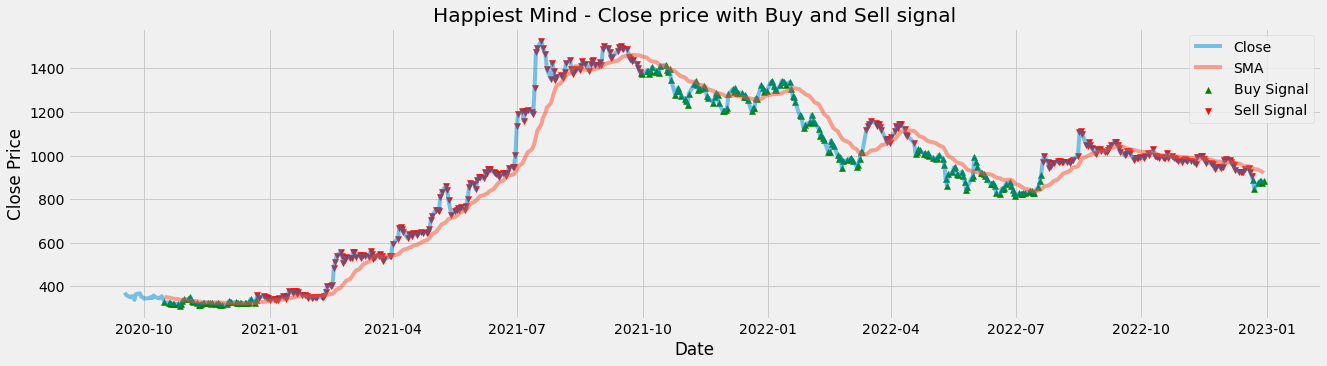

In [11]:
# Plot the buy and sell signal along with the close price
plt.figure(figsize = (20, 5))
plt.title('Happiest Mind - Close price with Buy and Sell signal')
plt.plot(df['Close'], alpha = 0.5, label ='Close')
plt.plot(df['SMA'] , alpha = 0.5, label ='SMA')
plt.scatter(pd.Series(df.index), df['Buy'], color = 'green', label = 'Buy Signal', marker ='^', alpha = 1)
plt.scatter(pd.Series(df.index), df['Sell'], color = 'red', label = 'Sell Signal', marker ='v', alpha = 1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**Calculate the returns of the Mean Reversion Trading Strategy**

In [12]:
df['Mean_Reversion_Strategy_Returns'] = df['positions'].shift(1)*df['Log_Returns']
df['Mean_Reversion_Strategy_Returns']

Date
2020-09-17 00:00:00+05:30         NaN
2020-09-18 00:00:00+05:30         NaN
2020-09-21 00:00:00+05:30         NaN
2020-09-22 00:00:00+05:30         NaN
2020-09-23 00:00:00+05:30         NaN
                               ...   
2022-12-26 00:00:00+05:30    0.028760
2022-12-27 00:00:00+05:30    0.010257
2022-12-28 00:00:00+05:30   -0.000227
2022-12-29 00:00:00+05:30   -0.007513
2022-12-30 00:00:00+05:30    0.006832
Name: Mean_Reversion_Strategy_Returns, Length: 569, dtype: float64

**Plot the cummulative log returns and the cummulative mean reversion strategy**

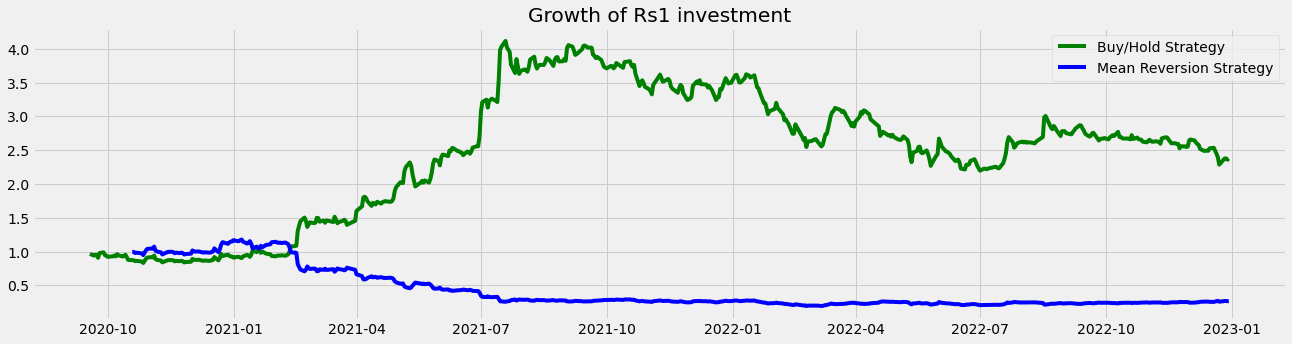

In [13]:
plt.figure(figsize = (20,5))
plt.title('Growth of Rs1 investment')
plt.plot(np.exp(df['Log_Returns'].dropna()).cumprod(), c = 'green', label = 'Buy/Hold Strategy')
plt.plot(np.exp(df['Mean_Reversion_Strategy_Returns'].dropna()).cumprod(), c = 'blue', label = 'Mean Reversion Strategy')
plt.legend()
plt.show()

**Calculate the Buy/Hold and Mean Reversion Strategy returns**

In [14]:
# -1 to get the last value return and subtracted by 1 because it was added intially
print(f"Buy/Hold Returns : {round(np.exp(df['Log_Returns'].dropna()).cumprod()[-1]-1,3)}")
print(f"Mean Reversion Strategy Returns : {round(np.exp(df['Mean_Reversion_Strategy_Returns'].dropna()).cumprod()[-1]-1,3)}")

Buy/Hold Returns : 1.376
Mean Reversion Strategy Returns : -0.73


**Conslusion:**
  * Buy/Hold strategy out performed Mean Reversion Strategy

# **<center>THE END</center>**